 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500 Index.

In [1]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
import seaborn as sns
from pathlib import Path
!pip
%matplotlib inline


Usage:   
  pip <command> [options]

Commands:
  install                     Install packages.
  download                    Download packages.
  uninstall                   Uninstall packages.
  freeze                      Output installed packages in requirements format.
  list                        List installed packages.
  show                        Show information about installed packages.
  check                       Verify installed packages have compatible dependencies.
  config                      Manage local and global configuration.
  search                      Search PyPI for packages.
  cache                       Inspect and manage pip's wheel cache.
  wheel                       Build wheels from your requirements.
  hash                        Compute hashes of package archives.
  completion                  A helper command used for command completion.
  debug                       Show information useful for debugging.
  help                        Show help 

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp500_history.csv`: Contains historical closing prices of the S&P 500 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [2]:
# Reading whale returns
whale_csv = Path('Resources/whale_returns.csv')
whale_df = pd.read_csv(whale_csv)
whale_df.head()

,Date,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
0,2015-03-02,NaN,NaN,NaN,NaN
1,2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2,2015-03-04,0.002230,0.003241,-0.002534,0.004213
3,2015-03-05,0.004016,0.004076,0.002355,0.006726
4,2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [3]:
# Set the date as the index to the DataFrame
whale_df.set_index(pd.to_datetime(whale_df['Date'], infer_datetime_format=True), inplace=True)
whale_df.head()

,Date,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,,
2015-03-02,2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [4]:
# Drop unnecessary columns
whale_df.drop(columns=['Date'], inplace=True)
whale_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [5]:
# Count nulls
whale_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [6]:
# Drop nulls
whale_df.dropna().copy()
whale_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [7]:
# Reading algorithmic returns
algo_csv = Path('Resources/algo_returns.csv')
algo_df = pd.read_csv(algo_csv)
algo_df.head()

,Date,Algo 1,Algo 2
0,2014-05-28,0.001745,NaN
1,2014-05-29,0.003978,NaN
2,2014-05-30,0.004464,NaN
3,2014-06-02,0.005692,NaN
4,2014-06-03,0.005292,NaN


In [8]:
# Set the date as the index to the DataFrame
algo_df.set_index(pd.to_datetime(algo_df['Date'], infer_datetime_format=True), inplace=True)
algo_df.head()

,Date,Algo 1,Algo 2
Date,,,
2014-05-28,2014-05-28,0.001745,NaN
2014-05-29,2014-05-29,0.003978,NaN
2014-05-30,2014-05-30,0.004464,NaN
2014-06-02,2014-06-02,0.005692,NaN
2014-06-03,2014-06-03,0.005292,NaN


In [9]:
# Drop unnecessary columns
algo_df.drop(columns=['Date'], inplace=True)
algo_df.head()

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [10]:
# Count nulls
algo_df.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [11]:
# Drop nulls
algo_df.dropna().copy()
algo_df.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

## S&P 500 Returns

Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data. 

In [12]:
# Reading S&P 500 Closing Prices
sp500_csv = Path('Resources/sp500_history.csv')
sp500_df = pd.read_csv(sp500_csv)
sp500_df.head()

,Date,Close
0,23-Apr-19,$2933.68
1,22-Apr-19,$2907.97
2,18-Apr-19,$2905.03
3,17-Apr-19,$2900.45
4,16-Apr-19,$2907.06


In [13]:
# Check Data Types
sp500_df.dtypes

Date     object
Close    object
dtype: object

In [14]:
# Fix Data Types
sp500_df['Close'] = sp500_df['Close'].str.replace('$', '', regex=False)

In [15]:
sp500_df['Close'] = sp500_df['Close'].astype('float') 

In [16]:
sp500_df.dtypes

Date      object
Close    float64
dtype: object

In [17]:
# Set the date as the index to the DataFrame
sp500_df.set_index(pd.to_datetime(sp500_df['Date'], infer_datetime_format=True), inplace=True)
sp500_df.head()

,Date,Close
Date,,
2019-04-23,23-Apr-19,2933.68
2019-04-22,22-Apr-19,2907.97
2019-04-18,18-Apr-19,2905.03
2019-04-17,17-Apr-19,2900.45
2019-04-16,16-Apr-19,2907.06


In [18]:
# Drop unnecessary columns
sp500_df.drop(columns=['Date'], inplace=True)
sp500_df.head()

,Close
Date,
2019-04-23,2933.68
2019-04-22,2907.97
2019-04-18,2905.03
2019-04-17,2900.45
2019-04-16,2907.06


In [19]:
# Calculate Daily Returns
sp500_daily_returns = sp500_df.pct_change()
sp500_daily_returns.head()

,Close
Date,
2019-04-23,NaN
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279


In [20]:
# Drop nulls
sp500_daily_returns.dropna(inplace=True)
sp500_daily_returns.head()

,Close
Date,
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279
2019-04-15,-0.000509


In [21]:
# Rename `Close` Column to be specific to this portfolio.
sp500_daily_returns = sp500_daily_returns.rename(columns = {'Close': 'S&P 500'})
sp500_daily_returns.head()

,S&P 500
Date,
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279
2019-04-15,-0.000509


## Combine Whale, Algorithmic, and S&P 500 Returns

In [22]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.
combined_df = pd.concat([whale_df, algo_df, sp500_daily_returns], axis='columns', join='inner')
combined_df = combined_df.dropna().copy()
combined_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,0.004408
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.001195
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.014378
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.003929
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.017254


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<AxesSubplot:xlabel='Date'>

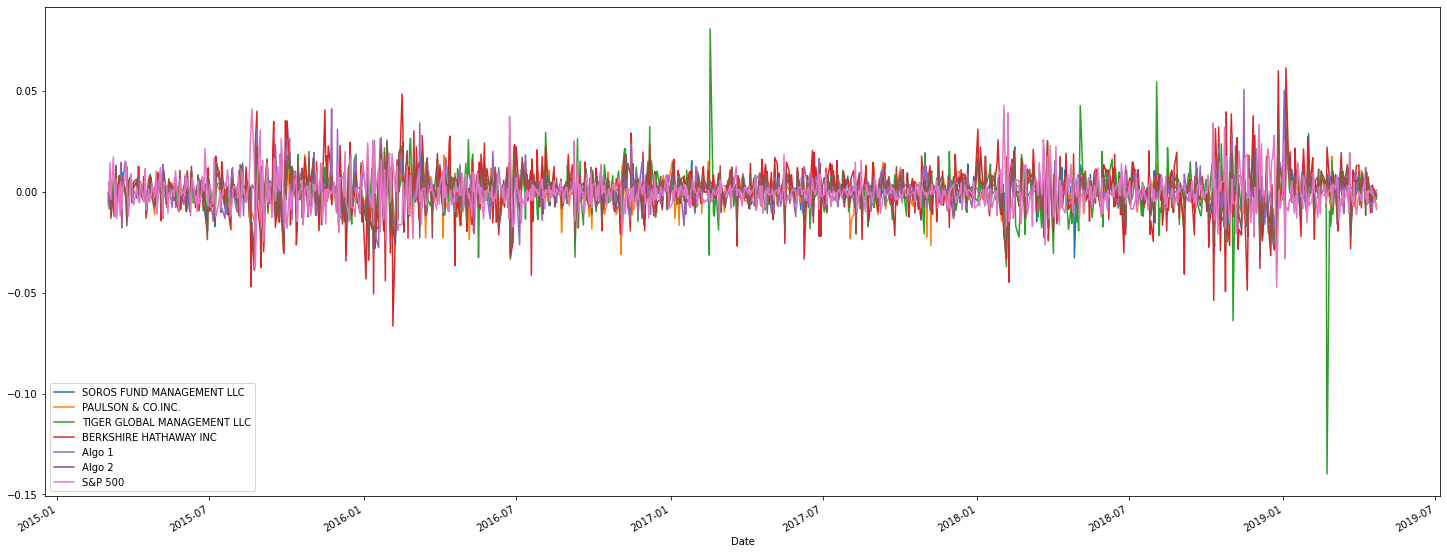

In [23]:
# Plot daily returns of all portfolios
combined_df.plot(figsize=(25,10))

#### Calculate and Plot cumulative returns.

In [24]:
# Calculate cumulative returns of all portfolios
cumulative_returns = (1 + combined_df).cumprod()
cumulative_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
Date,,,,,,,
2015-03-03,0.998734,0.995019,0.999504,0.993431,0.998058,0.999051,1.004408
2015-03-04,1.000962,0.998245,0.996972,0.997617,0.989486,1.001464,1.003208
2015-03-05,1.004981,1.002314,0.999319,1.004327,0.988541,1.005794,1.017632
2015-03-06,0.997037,0.998731,0.990844,0.991172,0.983641,0.994267,1.013634
2015-03-09,0.997617,1.002951,0.996633,0.989534,0.978283,0.995563,1.031123


<AxesSubplot:xlabel='Date'>

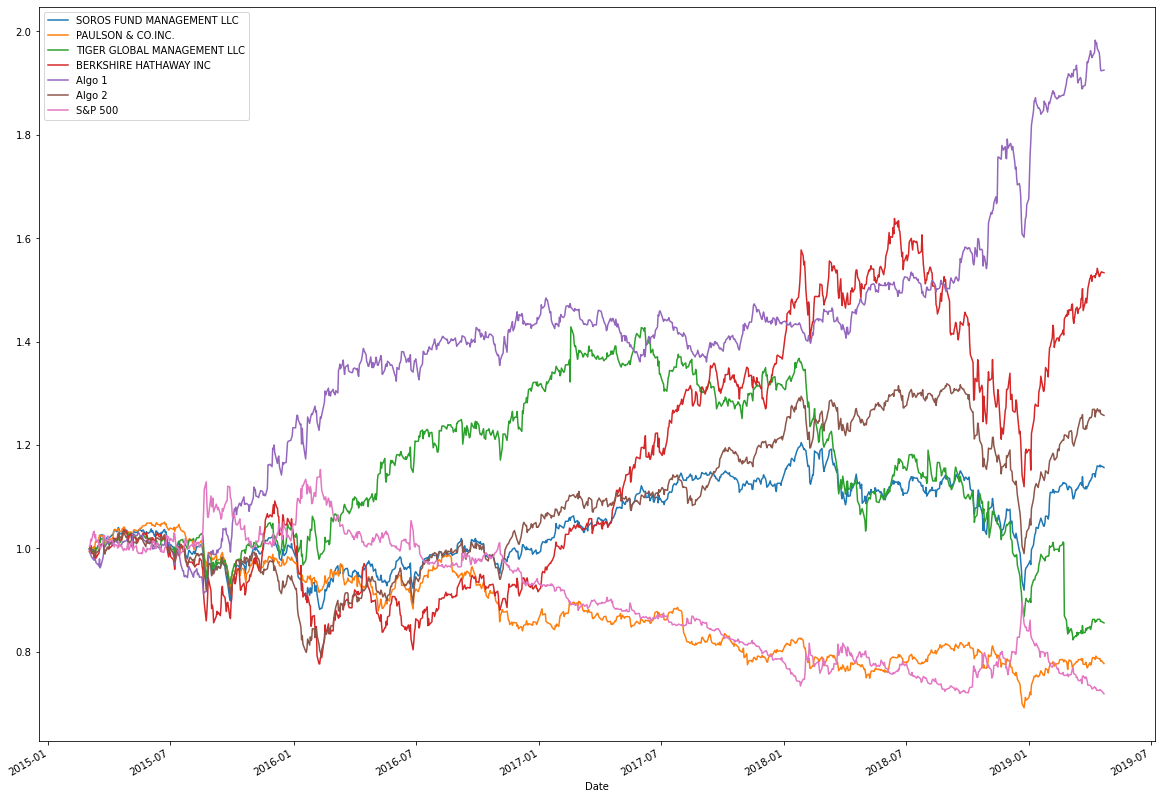

In [25]:
# Plot cumulative returns
cumulative_returns.plot(figsize=(20, 15))

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

import matplotlib.pyplot as plt### Create a box plot for each portfolio


In [26]:
import matplotlib.pyplot as plt

(array([1, 2, 3, 4, 5, 6, 7]),
 [Text(1, 0, 'SOROS FUND MANAGEMENT LLC'),
  Text(2, 0, 'PAULSON & CO.INC. '),
  Text(3, 0, 'TIGER GLOBAL MANAGEMENT LLC'),
  Text(4, 0, 'BERKSHIRE HATHAWAY INC'),
  Text(5, 0, 'Algo 1'),
  Text(6, 0, 'Algo 2'),
  Text(7, 0, 'S&P 500')])

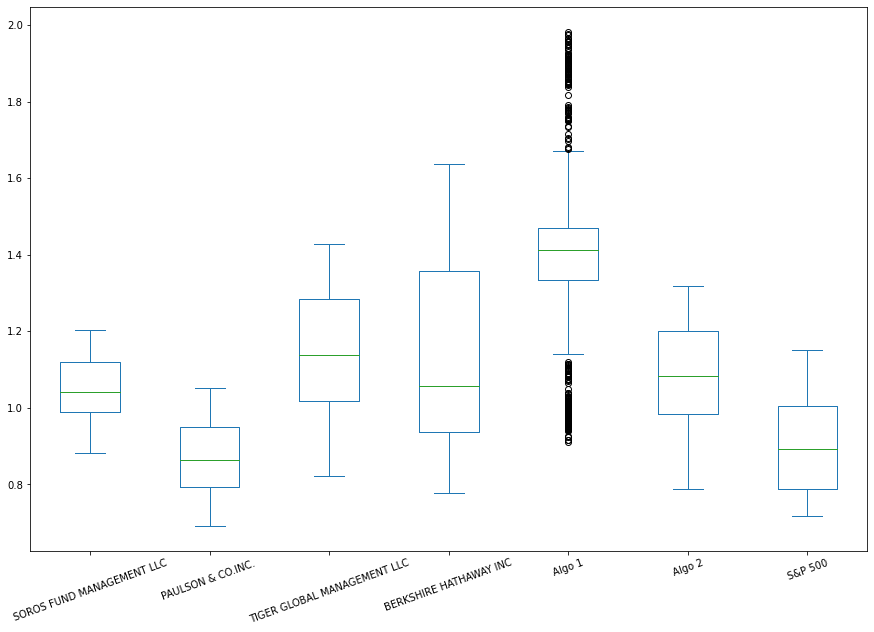

In [27]:
# Plot box plot!!!!!!
cumulative_returns.plot.box(figsize=(15, 10))
plt.xticks(rotation=20)

### Calculate Standard Deviations

In [28]:
# Calculate the daily standard deviations of all portfolios and the S&P 500
daily_std = combined_df.std()
daily_std

SOROS FUND MANAGEMENT LLC      0.007896
PAULSON & CO.INC.              0.007026
TIGER GLOBAL MANAGEMENT LLC    0.010897
BERKSHIRE HATHAWAY INC         0.012919
Algo 1                         0.007623
Algo 2                         0.008341
S&P 500                        0.008587
dtype: float64

### Determine which portfolios are riskier than the S&P 500

In [29]:
# Determine which portfolios are riskier than the S&P 500
daily_std.sort_values(inplace=True)
daily_std

PAULSON & CO.INC.              0.007026
Algo 1                         0.007623
SOROS FUND MANAGEMENT LLC      0.007896
Algo 2                         0.008341
S&P 500                        0.008587
TIGER GLOBAL MANAGEMENT LLC    0.010897
BERKSHIRE HATHAWAY INC         0.012919
dtype: float64

***The Tiger Global and Berkshire Hawthway portfolios are riskier than the S&P 500

### Calculate the Annualized Standard Deviation

In [30]:
# Calculate the annualized standard deviation (252 trading days)
annualized_std = daily_std * np.sqrt(252)
annualized_std.sort_values(inplace=True)
annualized_std

PAULSON & CO.INC.              0.111527
Algo 1                         0.121006
SOROS FUND MANAGEMENT LLC      0.125348
Algo 2                         0.132413
S&P 500                        0.136313
TIGER GLOBAL MANAGEMENT LLC    0.172989
BERKSHIRE HATHAWAY INC         0.205079
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for all portfolios using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500

### Calculate and plot rolling `std` for all portfolios with 21-day window

In [31]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
combined_rolling_std_df = combined_df.rolling(window=21).std().dropna()
combined_rolling_std_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
Date,,,,,,,
2015-03-31,0.005764,0.004641,0.006731,0.007108,0.007866,0.006867,0.009106
2015-04-01,0.005744,0.004467,0.006750,0.007005,0.007886,0.006894,0.009128
2015-04-02,0.005749,0.004502,0.006739,0.006958,0.007601,0.006955,0.009260
2015-04-06,0.005792,0.004492,0.006786,0.006884,0.007648,0.007028,0.008711
2015-04-07,0.005452,0.004385,0.006486,0.006193,0.007531,0.006530,0.008687


<AxesSubplot:xlabel='Date'>

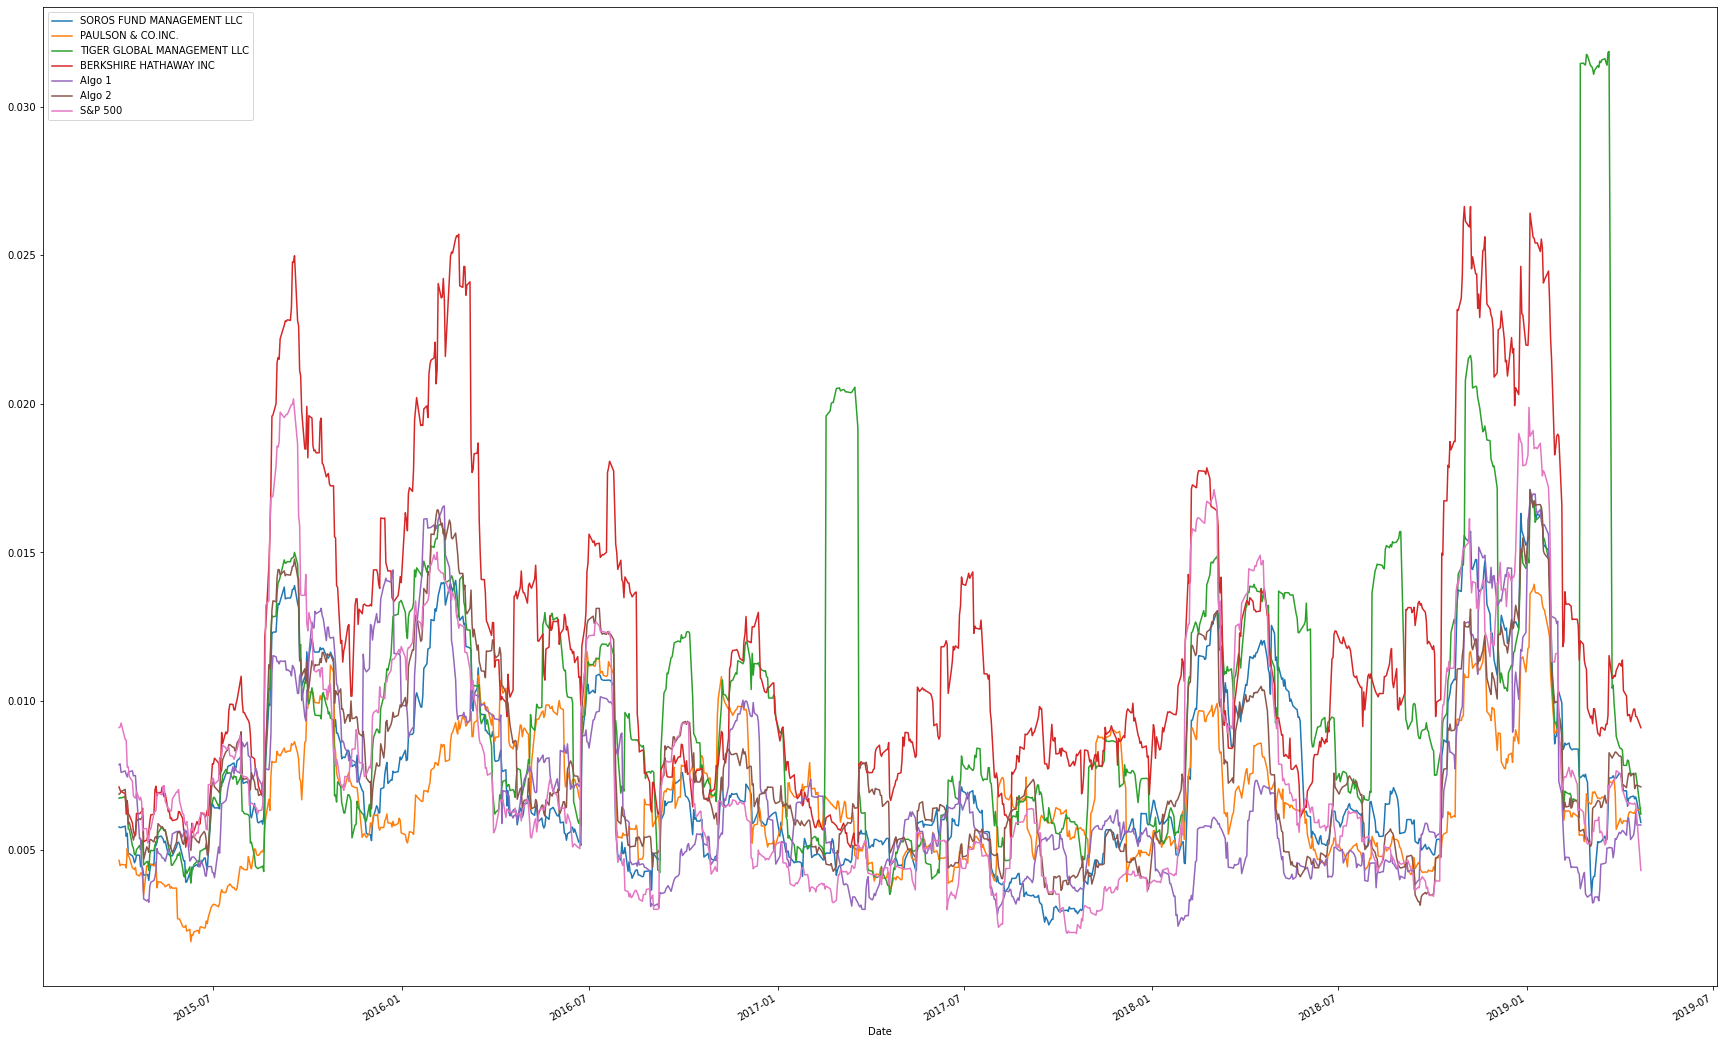

In [32]:
# Plot the rolling standard deviation
combined_rolling_std_df.plot(figsize=(30,20))

### Calculate and plot the correlation

<AxesSubplot:>

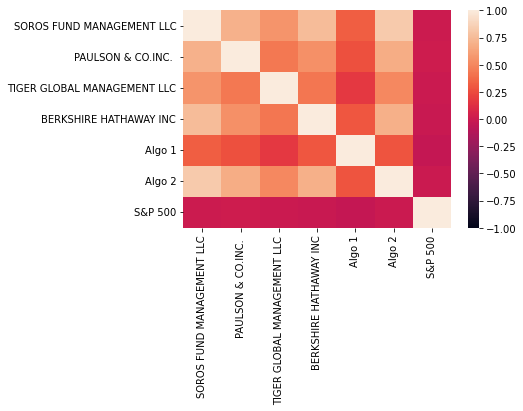

In [33]:
# Calculate the correlation
correlation = combined_df.corr()

# Display de correlation matrix
sns.heatmap(correlation, vmin=-1, vmax=1)

### Calculate and Plot Beta for a chosen portfolio and the S&P 500

In [34]:
# Calculate covariance of a single portfolio
algo1_covariance = cumulative_returns['Algo 1'].cov(cumulative_returns['S&P 500'])
algo1_covariance

-0.019775435384048825

In [35]:
# Calculate variance of S&P 500
sp500_variance = cumulative_returns['S&P 500'].var()
sp500_variance

0.01318961312579499

In [36]:
# Computing beta
algo1_beta = algo1_covariance / sp500_variance
algo1_beta

-1.4993188348621014

<AxesSubplot:title={'center':'Rolling 30-Day Covariance of Algo 1 Returns vs. S&P 500 Returns'}, xlabel='Date'>

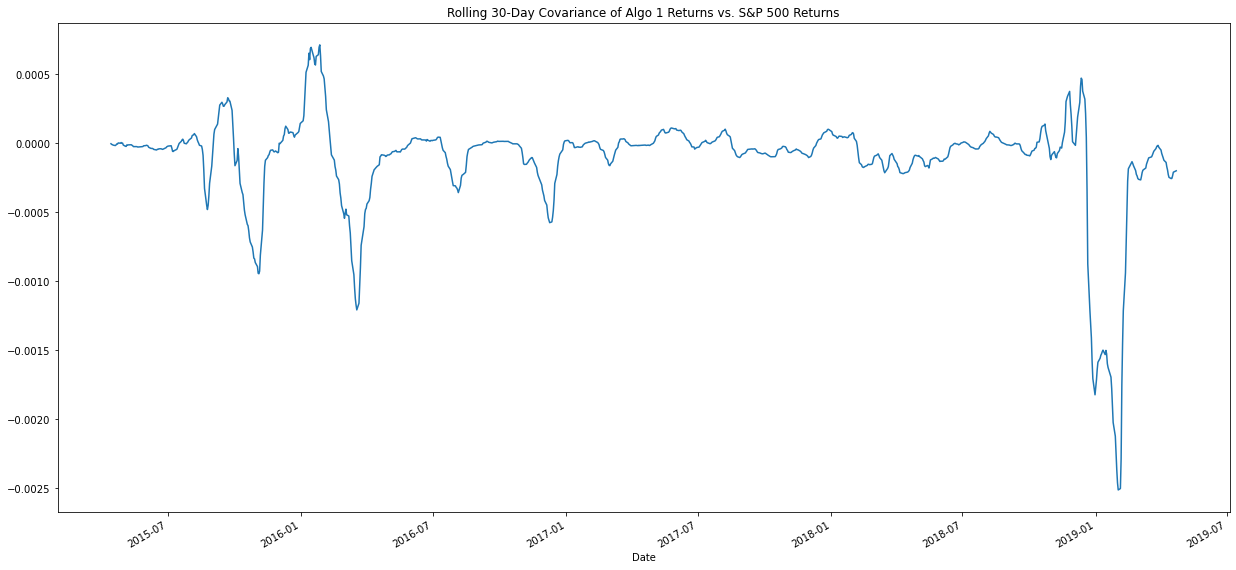

In [37]:
# Calculate 30-day rolling covariance of Algo 1 vs. S&P 500 and plot the data
algo1_rolling_covariance = cumulative_returns['Algo 1'].rolling(window=30).cov(cumulative_returns['S&P 500'])
algo1_rolling_covariance.plot(figsize=(21, 10), title = 'Rolling 30-Day Covariance of Algo 1 Returns vs. S&P 500 Returns')

<AxesSubplot:title={'center':'Rolling 30-Day Variance of S&P 500 Returns'}, xlabel='Date'>

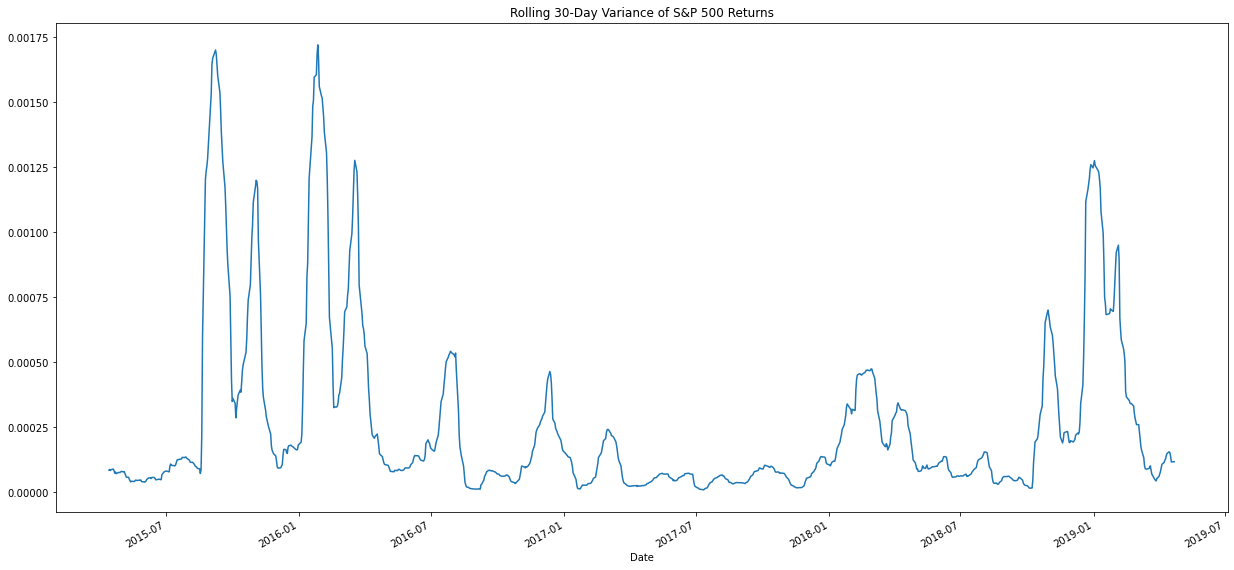

In [38]:
# Calculate 30-day rolling variance of S&P 500 and plot the data
sp500_rolling_variance = cumulative_returns['S&P 500'].rolling(window=30).var()
sp500_rolling_variance.plot(figsize=(21, 10), title = 'Rolling 30-Day Variance of S&P 500 Returns')

<AxesSubplot:title={'center':'Rolling 30-Day Beta of Algo 1'}, xlabel='Date'>

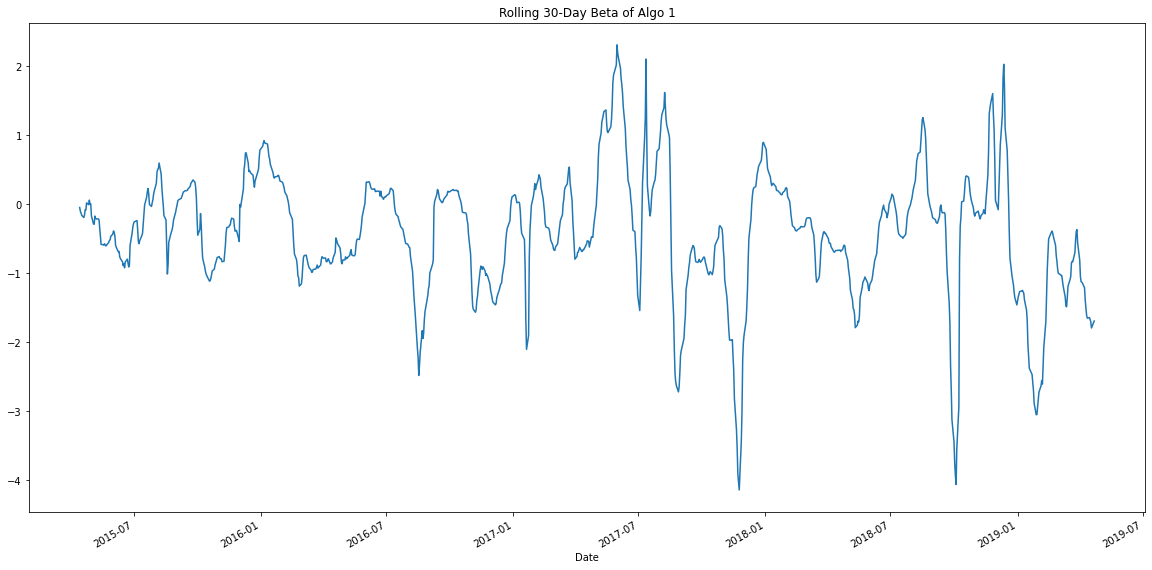

In [39]:
# Plot beta trend
rolling_beta = algo1_rolling_covariance / sp500_rolling_variance
rolling_beta.plot(figsize=(20, 10), title = 'Rolling 30-Day Beta of Algo 1')

In [40]:
cumulative_returns.corr(method='pearson')

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
SOROS FUND MANAGEMENT LLC,1.000000,-0.652630,0.331582,0.898649,0.468415,0.915000,-0.883445
PAULSON & CO.INC.,-0.652630,1.000000,-0.196056,-0.780294,-0.830854,-0.766890,0.859080
TIGER GLOBAL MANAGEMENT LLC,0.331582,-0.196056,1.000000,0.034734,0.057241,0.180681,-0.196116
BERKSHIRE HATHAWAY INC,0.898649,-0.780294,0.034734,1.000000,0.578256,0.945409,-0.923948
Algo 1,0.468415,-0.830854,0.057241,0.578256,1.000000,0.587959,-0.742933
Algo 2,0.915000,-0.766890,0.180681,0.945409,0.587959,1.000000,-0.962617
S&P 500,-0.883445,0.859080,-0.196116,-0.923948,-0.742933,-0.962617,1.000000


In [41]:
cumulative_returns.tail(21)

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
Date,,,,,,,
2019-03-22,1.118403,0.775611,0.836313,1.459907,1.893943,1.232322,0.753220
2019-03-25,1.114678,0.775285,0.837125,1.475582,1.895786,1.229786,0.747848
2019-03-26,1.119568,0.779659,0.844819,1.483518,1.906127,1.236690,0.751338
2019-03-27,1.115097,0.773951,0.841205,1.474556,1.922129,1.231178,0.748650
2019-03-28,1.118684,0.768561,0.846195,1.483350,1.941219,1.238289,0.743642
2019-03-29,1.120241,0.770890,0.845115,1.502312,1.939535,1.243955,0.735138
2019-04-01,1.130323,0.778655,0.848472,1.522116,1.955359,1.252983,0.735125
2019-04-02,1.130541,0.774280,0.842852,1.523869,1.962743,1.252465,0.733549
2019-04-03,1.134568,0.775290,0.847229,1.528824,1.956194,1.252824,0.732023


## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half-life.

In [42]:
cumulative_returns.index

DatetimeIndex(['2015-03-03', '2015-03-04', '2015-03-05', '2015-03-06',
               '2015-03-09', '2015-03-10', '2015-03-11', '2015-03-12',
               '2015-03-13', '2015-03-16',
               ...
               '2019-04-08', '2019-04-09', '2019-04-10', '2019-04-11',
               '2019-04-12', '2019-04-15', '2019-04-16', '2019-04-17',
               '2019-04-18', '2019-04-22'],
              dtype='datetime64[ns]', name='Date', length=1042, freq=None)

In [77]:
# Use `ewm` to calculate the rolling window
#times = ['2019-03-22', '2019-03-25', '2019-03-26', '2019-03-27', '2019-03-28', '2019-03-29', '2019-04-01', '2019-04-02', '2019-04-03', '2019-04-04', '2019-04-05', '2019-04-08', '2019-04-09', '2019-04-10', '2019-04-11', '2019-04-12', '2019-04-15', '2019-04-16', '2019-04-17', '2019-04-18', '2019-04-22']
ewa_rolling_stats = cumulative_returns.ewm(halflife=21).std().dropna()
ewa_rolling_stats

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
Date,,,,,,,
2015-03-04,0.001575,0.002281,0.001791,0.002959,0.006061,0.001707,0.000848
2015-03-05,0.003176,0.003659,0.001410,0.005510,0.005205,0.003427,0.008074
2015-03-06,0.003472,0.002964,0.004102,0.005837,0.005956,0.004884,0.007027
2015-03-09,0.003247,0.003222,0.003523,0.005976,0.007333,0.004682,0.011447
2015-03-10,0.005986,0.002975,0.005940,0.008323,0.007839,0.007804,0.012849
...,...,...,...,...,...,...,...
2019-04-15,0.041942,0.015645,0.074185,0.090048,0.088678,0.054262,0.028846
2019-04-16,0.042208,0.015494,0.073149,0.089692,0.087688,0.054109,0.028812
2019-04-17,0.042286,0.015263,0.072171,0.089413,0.086404,0.053736,0.028785


<AxesSubplot:title={'center':'Rolling Exponentially Weighted Average Standard Deviation, Half Life = 21'}, xlabel='Date'>

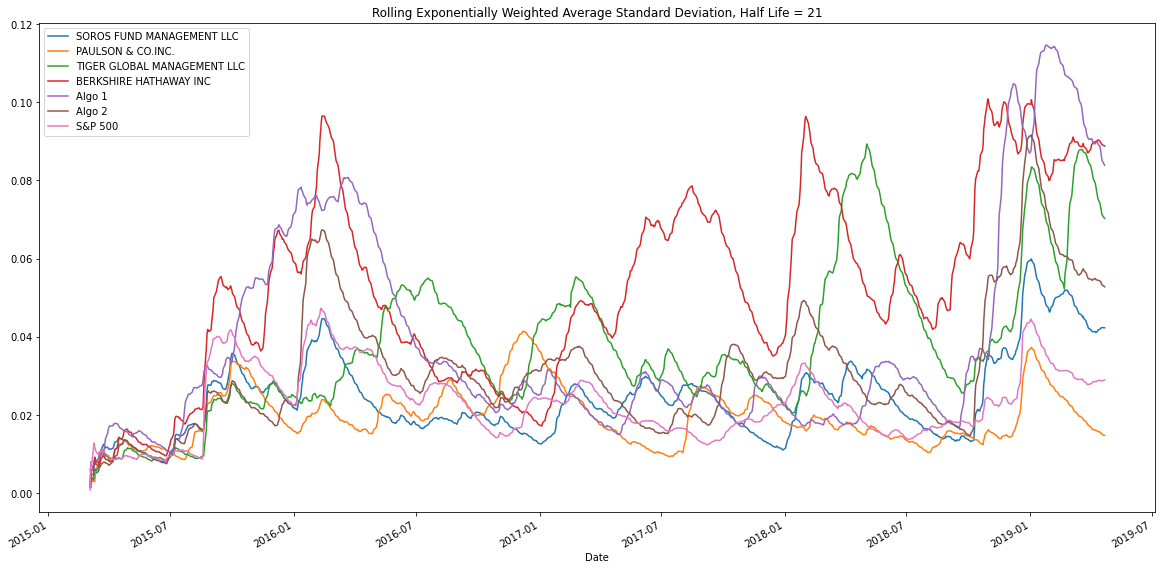

In [80]:
ewa_rolling_stats.plot(figsize=(20, 10), title = 'Rolling Exponentially Weighted Average Standard Deviation, Half Life = 21')

---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

### Risk Free Rate

Read the Risk Free Rate and clean the data

In [45]:
# Reading risk free rate
risk_free_rate_path= Path("Resources/risk_free_rate.csv")
risk_free_rate = pd.read_csv(risk_free_rate_path)
risk_free_rate.head()

,Date,rf_rate
0,1954-01-04,0.000148
1,1954-01-05,0.000142
2,1954-01-06,0.000142
3,1954-01-07,0.000146
4,1954-01-08,0.000146


In [46]:
# Set the date as the index to the DataFrame
risk_free_rate.set_index(pd.to_datetime(risk_free_rate['Date'], infer_datetime_format=True), inplace=True)
risk_free_rate.head()

,Date,rf_rate
Date,,
1954-01-04,1954-01-04,0.000148
1954-01-05,1954-01-05,0.000142
1954-01-06,1954-01-06,0.000142
1954-01-07,1954-01-07,0.000146
1954-01-08,1954-01-08,0.000146


In [47]:
# Drop unnecessary columns
risk_free_rate.drop(columns=['Date'], inplace=True)
risk_free_rate.head()

,rf_rate
Date,
1954-01-04,0.000148
1954-01-05,0.000142
1954-01-06,0.000142
1954-01-07,0.000146
1954-01-08,0.000146


### Calculate Annualized Std Dev

In [48]:
# Concat returns and risk-free rate into one DataFrame
all_portfolios_returns = pd.concat([combined_df, risk_free_rate], axis='columns', join='inner')
all_portfolios_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500,rf_rate
Date,,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,0.004408,0.000002
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.001195,0.000001
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.014378,0.000002
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.003929,0.000001
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.017254,0.000002


In [49]:
# Annualized Sharpe Ratios
sharpe_ratios = ((all_portfolios_returns.mean()-all_portfolios_returns['rf_rate'].mean()) * 252) / (all_portfolios_returns.std() * np.sqrt(252))
sharpe_ratios

SOROS FUND MANAGEMENT LLC      0.190407
PAULSON & CO.INC.             -0.710552
TIGER GLOBAL MANAGEMENT LLC   -0.289643
BERKSHIRE HATHAWAY INC         0.506337
Algo 1                         1.138814
Algo 2                         0.297261
S&P 500                       -0.779208
rf_rate                        0.000000
dtype: float64

<AxesSubplot:title={'center':'Sharpe Ratios'}>

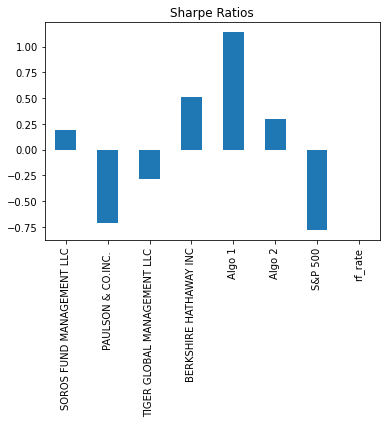

In [50]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot(kind='bar', title='Sharpe Ratios')

### Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

Write your answer here!

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

For this demo solution, we fetch data from three companies listes in the S&P 500 index.

* `GOOG` - [Google, LLC](https://en.wikipedia.org/wiki/Google)

* `AAPL` - [Apple Inc.](https://en.wikipedia.org/wiki/Apple_Inc.)

* `COST` - [Costco Wholesale Corporation](https://en.wikipedia.org/wiki/Costco)

In [51]:
# Reading data from GOOG stock
goog_csv = Path('Resources/goog_historical.csv')
goog_df = pd.read_csv(goog_csv, index_col='Trade DATE', infer_datetime_format=True, parse_dates=True)
goog_df.rename(columns={'NOCP': 'GOOG'}, inplace=True)
goog_df.drop(columns=['Symbol'], inplace=True)
goog_df

,GOOG
Trade DATE,
2019-05-09,1162.38
2019-05-08,1166.27
2019-05-07,1174.10
2019-05-06,1189.39
2019-05-03,1185.40
...,...
2018-05-17,1078.59
2018-05-16,1081.77
2018-05-15,1079.23


In [52]:
# Reading data from AAPL stock
aapl_csv = Path('Resources/aapl_historical.csv')
aapl_df = pd.read_csv(aapl_csv, index_col='Trade DATE', infer_datetime_format=True, parse_dates=True)
aapl_df.rename(columns={'NOCP': 'AAPL'}, inplace=True)
aapl_df.drop(columns=['Symbol'], inplace=True)
aapl_df

,AAPL
Trade DATE,
2019-05-09,200.72
2019-05-08,202.90
2019-05-07,202.86
2019-05-06,208.48
2019-05-03,211.75
...,...
2018-05-17,186.99
2018-05-16,188.18
2018-05-15,186.44


In [53]:
# Reading data from COST stock
cost_csv = Path('Resources/cost_historical.csv')
cost_df = pd.read_csv(cost_csv, index_col='Trade DATE', infer_datetime_format=True, parse_dates=True)
cost_df.rename(columns={'NOCP': 'COST'}, inplace=True)
cost_df.drop(columns=['Symbol'], inplace=True)
cost_df

,COST
Trade DATE,
2019-05-09,243.47
2019-05-08,241.34
2019-05-07,240.18
2019-05-06,244.23
2019-05-03,244.62
...,...
2018-05-17,199.60
2018-05-16,198.71
2018-05-15,195.48


In [54]:
# Combine all stocks in a single DataFrame
custom_portfolio = pd.concat([goog_df, aapl_df, cost_df], axis='columns', join='inner')
custom_portfolio

,GOOG,AAPL,COST
Trade DATE,,,
2019-05-09,1162.38,200.72,243.47
2019-05-08,1166.27,202.90,241.34
2019-05-07,1174.10,202.86,240.18
2019-05-06,1189.39,208.48,244.23
2019-05-03,1185.40,211.75,244.62
...,...,...,...
2018-05-17,1078.59,186.99,199.60
2018-05-16,1081.77,188.18,198.71
2018-05-15,1079.23,186.44,195.48


In [55]:
# Rename Index to match previious dataframes
custom_portfolio.index.names = ['Date']
custom_portfolio.head()

,GOOG,AAPL,COST
Date,,,
2019-05-09,1162.38,200.72,243.47
2019-05-08,1166.27,202.90,241.34
2019-05-07,1174.10,202.86,240.18
2019-05-06,1189.39,208.48,244.23
2019-05-03,1185.40,211.75,244.62


In [56]:
# Calculate daily returns, drop NAs and display sample data
portfolio_daily_returns = custom_portfolio.pct_change().dropna()
portfolio_daily_returns.head()

,GOOG,AAPL,COST
Date,,,
2019-05-08,0.003347,0.010861,-0.008749
2019-05-07,0.006714,-0.000197,-0.004806
2019-05-06,0.013023,0.027704,0.016862
2019-05-03,-0.003355,0.015685,0.001597
2019-05-02,-0.019226,-0.012279,-0.007890


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [57]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return
portfolio_weighted_returns = portfolio_daily_returns.dot(weights)
# Display sample data
portfolio_weighted_returns.head()

Date
2019-05-08    0.001820
2019-05-07    0.000570
2019-05-06    0.019196
2019-05-03    0.004642
2019-05-02   -0.013131
dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [58]:
# Join your returns DataFrame to the original returns DataFrame
all_returns = pd.concat([portfolio_weighted_returns, all_portfolios_returns], axis='columns', join='inner')
all_returns.rename(columns={0: 'Custom Portfolio'}, inplace=True)

In [59]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
all_returns.dropna().copy()
all_returns

,Custom Portfolio,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500,rf_rate
Date,,,,,,,,,
2019-04-22,-0.011812,-0.002586,-0.007333,-0.003640,-0.001088,0.000677,-0.001936,-0.008764,0.000266
2019-04-18,-0.001148,0.001448,0.001222,0.000582,0.001916,-0.000588,-0.001229,-0.001011,0.000263
2019-04-17,-0.001541,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.001577,0.000266
2019-04-16,-0.009149,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.002279,0.000264
2019-04-15,-0.000326,-0.001422,-0.001156,0.000398,-0.010492,-0.004331,-0.004572,-0.000509,0.000264
...,...,...,...,...,...,...,...,...,...
2018-05-17,0.006112,-0.001955,0.002524,-0.006267,-0.005140,-0.006949,0.005205,0.002639,0.000209
2018-05-16,0.001618,0.008637,0.006244,0.005480,0.004310,-0.002326,0.003341,0.000857,0.000209
2018-05-15,-0.009283,-0.000726,-0.001409,-0.003189,-0.014606,-0.001135,-0.001139,-0.004044,0.000210


## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [60]:
# Calculate the annualized `std`
volatility = all_returns.std() * np.sqrt(252)
volatility

Custom Portfolio               0.213973
SOROS FUND MANAGEMENT LLC      0.145920
PAULSON & CO.INC.              0.116741
TIGER GLOBAL MANAGEMENT LLC    0.232702
BERKSHIRE HATHAWAY INC         0.246699
Algo 1                         0.133956
Algo 2                         0.138738
S&P 500                        0.152774
rf_rate                        0.000345
dtype: float64

### Calculate and plot rolling `std` with 21-day window

<AxesSubplot:xlabel='Date'>

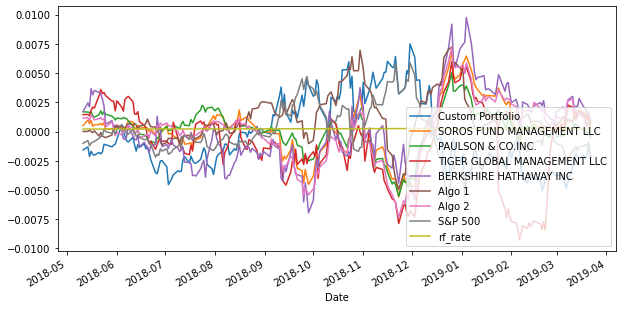

In [61]:
# Calculate rolling standard deviation

# Plot rolling standard deviation
all_returns.rolling(window=21).mean().plot(figsize=(10,5))

### Calculate and plot the correlation

In [62]:
# Calculate the correlation
all_correlation = all_returns.corr()
all_correlation

,Custom Portfolio,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500,rf_rate
Custom Portfolio,1.000000,0.065207,0.027922,0.037704,0.008857,0.071980,0.042850,0.870171,0.014839
SOROS FUND MANAGEMENT LLC,0.065207,1.000000,0.789522,0.478722,0.814507,0.345841,0.859998,-0.026497,0.036673
PAULSON & CO.INC.,0.027922,0.789522,1.000000,0.485032,0.647531,0.366601,0.782482,-0.059014,-0.044787
TIGER GLOBAL MANAGEMENT LLC,0.037704,0.478722,0.485032,1.000000,0.324873,0.118810,0.410751,0.005578,-0.070440
BERKSHIRE HATHAWAY INC,0.008857,0.814507,0.647531,0.324873,1.000000,0.331230,0.779523,-0.037457,0.067299
Algo 1,0.071980,0.345841,0.366601,0.118810,0.331230,1.000000,0.371758,-0.054685,0.067294
Algo 2,0.042850,0.859998,0.782482,0.410751,0.779523,0.371758,1.000000,-0.040997,0.014996
S&P 500,0.870171,-0.026497,-0.059014,0.005578,-0.037457,-0.054685,-0.040997,1.000000,-0.007909
rf_rate,0.014839,0.036673,-0.044787,-0.070440,0.067299,0.067294,0.014996,-0.007909,1.000000


<AxesSubplot:>

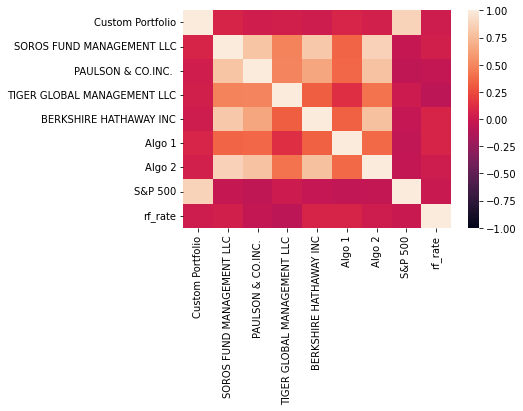

In [63]:
# Plot the correlation
sns.heatmap(all_correlation, vmin=-1, vmax=1)

### Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

In [64]:
# Calculate covariance of all daily returns of Custom Portfolio vs. S&P 500
custom_covariance = all_returns['Custom Portfolio'].cov(all_returns['S&P 500'])
custom_covariance

0.00011287911955636969

In [65]:
# Calculate variance of S&P 500
custom_variance = all_returns['S&P 500'].var()
custom_variance

9.261922593193084e-05

In [66]:
# Calculate and plot Beta
custom_beta = custom_covariance / custom_variance
custom_beta

1.2187439316252606

<AxesSubplot:title={'center':'Rolling 30-Day Covariance of Custom Portfolio Returns vs. S&P 500 Returns'}, xlabel='Date'>

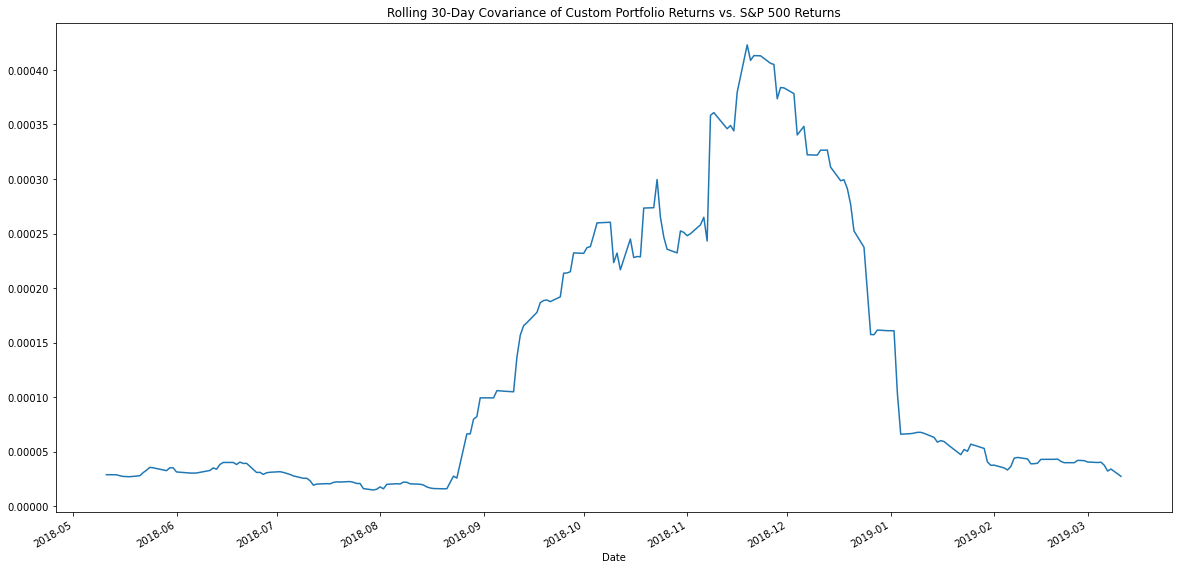

In [67]:
# Calculate 30-day rolling covariance of AMZN vs. S&P 500 and plot the data
custom_rolling_covariance = all_returns['Custom Portfolio'].rolling(window=30).cov(all_returns['S&P 500'])
custom_rolling_covariance.plot(figsize=(20, 10), title='Rolling 30-Day Covariance of Custom Portfolio Returns vs. S&P 500 Returns')

<AxesSubplot:title={'center':'Rolling 30-Day Variance of S&P 500 Returns'}, xlabel='Date'>

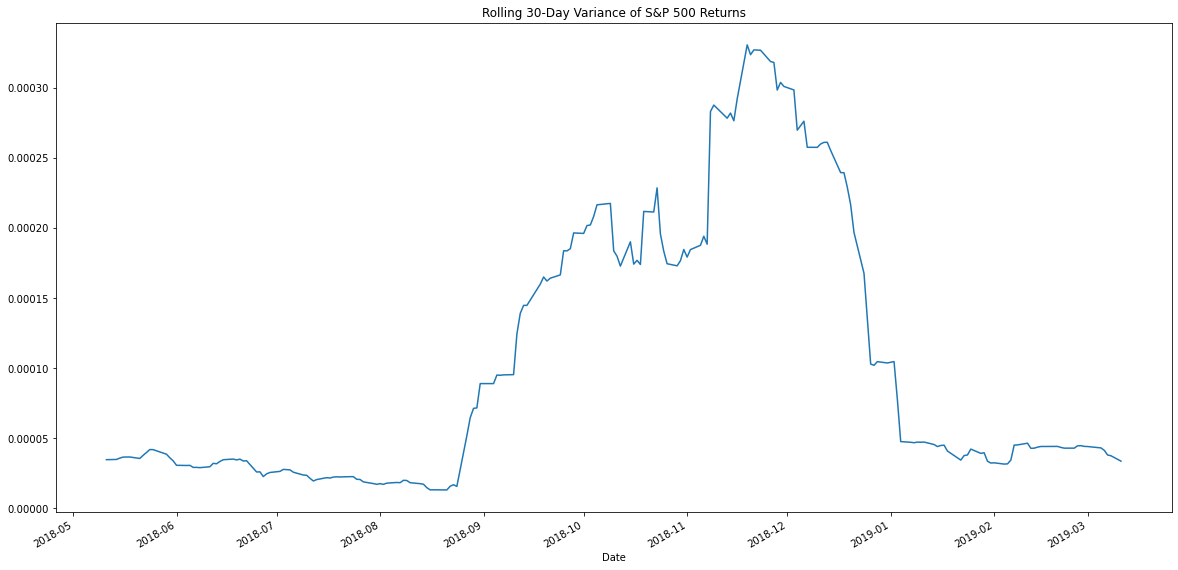

In [68]:
# Calculate 30-day rolling variance of S&P 500 and plot the data
custom_rolling_variance = all_returns['S&P 500'].rolling(window=30).var()
custom_rolling_variance.plot(figsize=(20, 10), title='Rolling 30-Day Variance of S&P 500 Returns')

<AxesSubplot:title={'center':'Rolling 30-Day Beta of Custom Portfolio'}, xlabel='Date'>

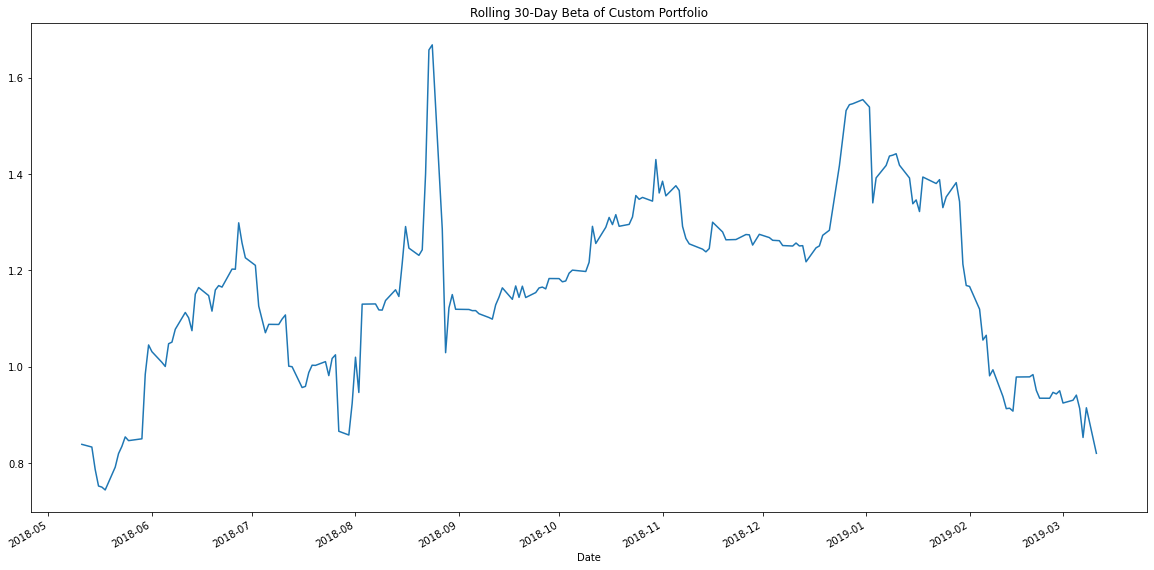

In [69]:
# Calculate 30-day rolling beta of Custom Portfolio and plot the data
custom_rolling_beta = custom_rolling_covariance / custom_rolling_variance
custom_rolling_beta.plot(figsize=(20, 10), title='Rolling 30-Day Beta of Custom Portfolio')

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [70]:
# Calculate Annualzied Sharpe Ratios
custom_sharpe_ratios = ((all_returns.mean()-all_returns['rf_rate'].mean()) * 252) / (all_returns.std() * np.sqrt(252))
custom_sharpe_ratios

Custom Portfolio              -0.917924
SOROS FUND MANAGEMENT LLC      0.084842
PAULSON & CO.INC.             -0.195266
TIGER GLOBAL MANAGEMENT LLC   -1.340039
BERKSHIRE HATHAWAY INC        -0.035163
Algo 1                         1.526639
Algo 2                        -0.270107
S&P 500                       -0.858378
rf_rate                        0.000000
dtype: float64

<AxesSubplot:title={'center':'Portfolio Sharpe Ratios'}>

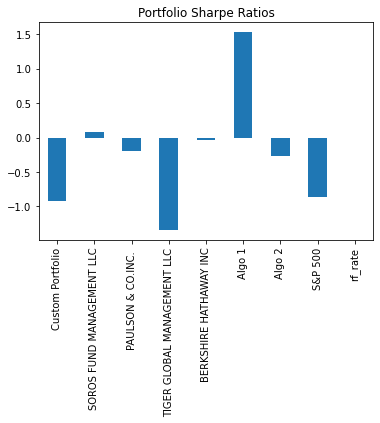

In [71]:
# Visualize the sharpe ratios as a bar plot
custom_sharpe_ratios.plot(kind='bar', title='Portfolio Sharpe Ratios')

### How does your portfolio do?

Write your answer here!

The custom portfolio performed poorly compared to the other portfolios